# Predict survival on the Titanic using Excel, Python, R & Random Forests

If you're new to data science and machine learning, or looking for a simple intro to the Kaggle competitions platform, this is the best place to start. Continue reading below the competition description to discover a number of tutorials, benchmark models, and more.

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

* Data Files

File Name	Available Formats
train.csv                (59.76 kb)
gendermodel.csv          (3.18 kb)
genderclassmodel.csv     (3.18 kb)
test.csv                 (27.96 kb)
gendermodel.py           (3.58 kb)
genderclassmodel.py      (5.63 kb)
myfirstforest.py         (3.99 kb)

# Study be practice

All practise in this notebook is applied using 'Applied Machine Learning Process' of machinelearningmastery.com

## I.Define the problem

** 1. What is the problem?
 
 - Informally: Predict survival of people in Titanic sank.
 - Formally: Predict survival of people in test.csv after learning in train.csv with highest performance.
 - Assumption:
     ++ Age and Gender matter to the surival.
     ++ Price of room where they lived matter to the survival.

** 2. Why you need to solve this problem?

 - Because I need to create a porfolio for machine learning, and Titanic is the best place to start.
 - Titanic is the first dataset Kaggle suggest to practice.
 - These are lots of notebook about Titanic to find out, understand the process, etc.
 - The solution is to use a machine learning algorithm to predict the survival of people in test.csv.
 
** 3. How would I solve the problem?

 - First: Understand the data, what is its features. 
 - Second: Check the outliers, missing datas.
 - Third: Univariate and Bivariate to understand the correlation between features and survival.
 - Fourth: Remove outliers, missing datas in need.
 - Fifth: Fit the training data into some machine learning algorithm to find the best algorithm to predict the survival.
 


## Data Exploration
In this section, I will explore and prepare data for modelling in the next section


1. Variable Identification
Features in our training data:

  - Pclass: Passenger Class (1-3). Richest people lived at 1st class.            (Number - Categorical)
  - Sex: male or female.                                                         (Text - Categorical)
  - Age                                                                          (Number - Continuous)
  - SibSp: Number of Siblings/Spouses Aboard (Brother,Sister,Stepbrother,Stepsister ) (Number - Continuous)
  - Parch: Number of Parents/Children Aboard.                                         (Number - Continuous)
  - Ticket: Ticket number. If its matter the survival, i will be very suprise.        (Text - Categorical(lots of))
  - fare:Passenger Fare.                                                              (Number - Continuous)
  - cabin: Cabin                                                                      (??)
  - embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)    (Text - Categorical)

Label:
  - Survived: Survival of people: 1/0                                                 (Number - Categorical)
                


2. Univariate Analysis
Visuallize to see the correlation between each feature with label

In [107]:
#At first let import the date
import os
os.getcwd()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#If feature has NaN value, the visualization with be not correctly, so i will try to check the missing first 
print (data.shape)

#Using pandas.series.isnull()
for col in data.columns.values:
    nan_values = data[col].isnull().sum()
    if nan_values:
        print ("Number of NaN value of feature "+col+ " :" + str( nan_values) )


#print (data.isnull().any())


(891, 12)
Number of NaN value of feature Age :177
Number of NaN value of feature Cabin :687
Number of NaN value of feature Embarked :2


In [108]:
#As we see, feature Cabin have format like letter plus number. I dont think it has two much reflection on predict 
#the survival of people. Also, the NaN value of Cabin is 687 on total 891. 
#So i will remove Cabin from our dataset
if 'Cabin' in data.columns.values:
    data.drop(['Cabin'], axis=1, inplace=True)

test = data.dropna()
test.shape

(712, 11)

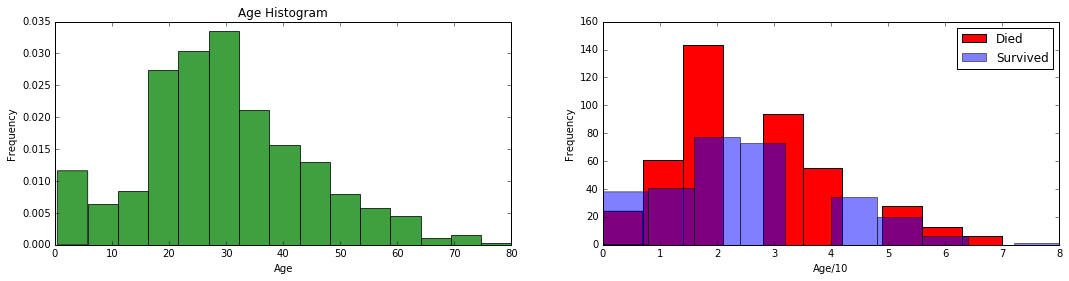

In [133]:
#With age feature, i consider in replace with mean value or remove its.
#I will visuallize the relation between age and survival to decide whether remove or fill NaN values of Age
fig = plt.figure(figsize=(18,4), dpi=1600)

ax1=fig.add_subplot(121)
age_test = data[['Age','Survived']]
age_test = age_test[age_test['Age'].notnull()]
#print (age_test.head(10))
plt.hist(age_test['Age'],15,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')



ax2=fig.add_subplot(122)
age_test['Age'] = age_test['Age'] /10
age_test['Age'] = age_test['Age'].astype('int')
#print (age_test.head(10))
age_test['Age'][age_test['Survived']==0].plot(kind='hist', color='r')
age_test['Age'][age_test['Survived']==1].plot(kind='hist', alpha=0.5)
ax2.set_xlabel('Age/10')
ax2.legend(['Died','Survived'])


From visuallize above, we can see that:
 - 